# Processing a Folder of Tip Logs
Tim Tyree<br>
6.22.2021

In [56]:
from lib.my_initialization import *
from lib import *
import trackpy, pandas as pd, numpy as np
from lib.routines.comp_imsd import *

%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
1

1

# particle tracking by nearest neighbors for a folder of tip logs with trajectory unwrapping at the end

In [2]:
# #find file interactively
# print("please select a file from within the desired folder.")
# file = search_for_file()
# # file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/Log/ic001.21_log.csv'
# print(file)
# # file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/Log/ic_200x200.001.12_log.csv'
# input_fn=file
# ds=10
# width=10
ds=5
width=200
height=width
DS=ds/width


# #token LR local data run 
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/Log/ic001.21_log.csv"

# #token FK local data run 
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/Log/ic200x200.0.1_log.csv"
# # input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# df=pd.read_csv(input_fn)
# print(input_fn)
# DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")
file=input_fn
trgt='log.csv'
assert(file[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(file,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

number of files in list: 159


In [3]:
#works for repositories outside of care
# input_fn=file
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
ic_suite_fn=os.path.dirname(trial_folder_name)
# ic_suite_fn=ic_suite_fn.split('/')[-1]
print(ic_suite_fn)
trial_folder_name=trial_folder_name.split('/')[-1]
print(trial_folder_name)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR
param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025


In [4]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
npartitions=os.cpu_count()
npartitions=10
# #particle models
# ds=10
# width=10
# kwargs={
#     'input_fn_lst':file_name_list,
#     'L':width,
#     'DS':ds/width,
#     'use_cache_0':True,
#     'use_cache_1':True,
#     'npartitions':npartitions,
#     'sr':3*width,
#     'mem':0,
#     'trial_folder_name':trial_folder_name,
#     'ic_suite_fn':ic_suite_fn
# }

#full models
# ds=5
# width=200
kwargs={
    'input_fn_lst':file_name_list,
    'L':width,
    'DS':ds/width,
    'use_cache_0':True,
    'use_cache_1':True,
    'npartitions':npartitions,
    'sr':3*width,
    'mem':0,
    'trial_folder_name':trial_folder_name,
    'ic_suite_fn':ic_suite_fn
}
DS,width,trial_folder_name

(0.025, 200, 'param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025')

In [8]:
#test the routine that takes log to unwrapped trajectory
testing=True
if testing:
    output_file_name=run_routine_log_to_unwrapped_trajectory(input_fn, use_cache=False,**kwargs)
    print(output_file_name)

KeyboardInterrupt: 

In [10]:
beep(10)

0

In [ ]:
df_summary=workflow_reduce_logs_to_diffcoeff_summary(**kwargs)
beep(1)

Frame 942118: 2 trajectories present.


In [122]:
#TODO(later): fix D and Delta_D measurements for functions that compute df_summary
workflow_reduce_logs_to_diffcoeff_summary

<function lib.routines.dag_log_to_msd.workflow_reduce_logs_to_diffcoeff_summary(input_fn_lst, L, DS, use_cache_0=True, use_cache_1=False, npartitions=2, **kwargs)>

# analyze annihilation/creation events

## annihilation events

In [149]:
#select a file from trajectories/
# input_fn=search_for_file()

# # #particle model
# # input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv"
# #DONE?: attraction with annihilation and with diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log3_log.csv"
# #TODO: attraction with annihilation but without diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"
# ds=10
# width=10
# pid_col='pid_explicit'


# #LR
# # # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'
# # # # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'

# #FK
# input_fn="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/trajectories/ic200x200.0.28_traj_sr_600_mem_0.csv"
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
ds=5
width=200
pid_col='particle'
t_col='t'

height=width
df=pd.read_csv(input_fn);print(input_fn)
DT=np.around(get_DT(df,pid_col=pid_col),5);print(f"the time resolution is {DT} ms.")
DS=ds/width
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv
the time resolution is 0.025 ms.


In [150]:
trgt=input_fn[input_fn.find('_traj_'):]
# trgt='_traj_sr_600_mem_0.csv'
assert(input_fn[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(input_fn,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

number of files in list: 125


In [151]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']
print(f"termination time was {df[t_col].max():.2f} ms")

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

termination time was 29999.98 ms
printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025:
count    51478.000000
mean         5.472239
std         13.103651
min         -0.000000
25%          0.100000
50%          0.425000
75%          2.225000
max        231.100000
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [152]:
# df.head()

In [153]:
# #particle model
min_duration=40  #20. #ms # a pair of particles is considered if their lifetime is at least min_range
min_range   =0  #cm  # a pair of particles is considered if their max distance is at least min_range
filter_beginning=True
use_min_duration=True
use_grad_voltage=False
range_threshold=10 #cm #filter any deaths occurring at ranges exceeding range_threshold
round_t_to_n_digits=5
tmin=0.  #filter all times earlier than tmin? i think so?
max_dur=0.#ms

#full model fk
min_duration=300##20. #ms
min_range   =.5  #cm
filter_beginning=True
use_min_duration=True
use_grad_voltage=True
range_threshold=.1 #cm #filter any deaths occurring at ranges exceeding range_threshold
tmin=100#ms
max_dur=150#ms #consider only the last max_dur milliseconds of either trajectory

#full model lr
min_duration=150##20. #ms
min_range   =.5  #cm
filter_beginning=True
use_min_duration=True
use_grad_voltage=True
range_threshold=.1 #cm #filter any deaths occurring at ranges exceeding range_threshold
tmin=100#ms
max_dur=150#ms #consider only the last max_dur milliseconds of either trajectory


# filter_beginning=False
# use_min_duration=False

npartitions=os.cpu_count()
# npartitions=10#1

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
#     'DT':DT,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
    'npartitions':npartitions,
    'filter_beginning':filter_beginning,
    'use_grad_voltage':use_grad_voltage,
    'use_min_duration':use_min_duration,
    'range_threshold':range_threshold,
    'round_t_to_n_digits':round_t_to_n_digits,
    'tmin':tmin,
    'pid_col':pid_col,
    'max_dur':max_dur,
    'folder_out_name':f'annihilations_mindur_{min_duration}_maxdur_{max_dur}_minrange_{min_range}_rangethresh_{range_threshold}'
}#'folder_out_name':f'annihilations
kwargs
# get_routine_traj_to_annihilation
# compute_annihilation_events

{'width': 200,
 'height': 200,
 'ds': 5,
 'printing': False,
 'min_range': 0.5,
 'min_duration': 150,
 'npartitions': 12,
 'filter_beginning': True,
 'use_grad_voltage': True,
 'use_min_duration': True,
 'range_threshold': 0.1,
 'round_t_to_n_digits': 5,
 'tmin': 100,
 'pid_col': 'particle',
 'max_dur': 150,
 'folder_out_name': 'annihilations_mindur_150_maxdur_150_minrange_0.5_rangethresh_0.1'}

In [154]:
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)
def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [155]:
use_test=True
if use_test:
    df=pd.read_csv(routine(input_fn))
    df.head()

KeyboardInterrupt: 

In [240]:
# DONE: moved to operari
# def compute_event_id(df,input_fn,pid_col='pid'):
#     '''computes a unique float that is unique for each event identified here by pid_col and is unique across files.
#     fn = os.path.basename(input_fn)
#     event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', fn)])))
#     df['event_id']=event_id_int+df['pid']/df['pid'].max()
#     '''
#     #compute event_id
#     import re
#     fn = os.path.basename(input_fn)
#     event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', fn)])))
#     df['event_id']=event_id_int+df['pid']/df['pid'].max()
#     return df

# compute_event_id(df,input_fn,pid_col='pid')
# df.head()

# #verify the number of distinct pid is equal to the number of distinct event_id
# assert ( len(sorted(set(df['pid'].values)))==len(sorted(set(df['event_id'].values))) ) 

In [ ]:
# df=pd.read_csv('/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilations/ic200x200.0.28_traj_sr_600_mem_0_annihilations.csv')
# df.head()
# df[df.pid==df.pid_deathmate]
# # #compute interactions
# # df_interactions = compute_df_interactions(input_fn, DS=DS,width=width,height=height,tmin=tmin)
# # df_interactions.dropna(inplace=True)
# # death_ranges = DS * df_interactions.rT.values
# # birth_ranges = DS * df_interactions.r0.values
# # df_interactions.head()

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'

trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")
print(f"token example fn: {input_fn_lst[0]}")
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of annihilation events for 125 trajectory .csv files...
token example fn: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic014.12_traj_sr_600_mem_0.csv


In [ ]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]

In [ ]:
# fn=search_for_file()
# #full model from unwrapped trajectory
# input_fn_lst2=get_all_files_matching_pattern(file=fn,trgt='_annihilations.csv')

# print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

In [ ]:
# list_of_files=input_fn_lst2
# min_range=1#cm
# min_duration=20#ms
produce_one_csv

In [ ]:
#merge all csv files into one big-ol' csv file
#save_fn=f'annihilations_minr_{min_range}_mindur_{min_duration}.csv'
save_fn=kwargs['folder_out_name']+'.csv'
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),save_fn)
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

In [265]:
beep(3)

0

## creation events

In [17]:
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)
def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [18]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of creation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of creation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of creation events for 200 trajectory .csv files...


AttributeError: 'DataFrame' object has no attribute 'particle'

In [ ]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]

In [ ]:
print(len(list_of_files))
assert (len(list_of_files)>0)

In [ ]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'creations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

In [ ]:
beep(10)

# MSD computation in the bulk of wrapped or unwrapped trajectories

In [6]:
# #input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
# #Load example particle Log file where I want to compute MSD and tracking has already been done 
# #(good): data that uses explicit particle tracking
# input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
# # input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

#TODO?: no attraction, no annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#DONE: attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"

#TODO: attraction with annihilation but without diffusion
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_0_L_10_kappa_1500_varkappa_5/Log/pbc_particle_log1_log.csv"
pid_col='pid_explicit'
t_col='t'
width=10 #width of computational domain
ds   =10  #cm


#full models
#LR
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# # # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'
# # # input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'
# # # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"


#unwrapped LR at DT=0.025 ms
input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories_unwrap/ic002.11_traj_sr_600_mem_0_unwrap.csv"

# #FK
# input_fn
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"

#unwrapped FK at DT=0.025 ms
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/trajectories_unwrap/ic200x200.0.3_traj_sr_600_mem_0_unwrap.csv'

ds=5
width=200
pid_col='particle'
t_col='t'

trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width
DT=np.around(get_DT(df, t_col=t_col, pid_col=pid_col),5);print(f"DT={DT} ms")
kwargs={}

DT=0.025 ms


1

In [8]:
use_unwrap=False
#choose use_unwrap=True if the input trajectories are not already unwrapped
if use_unwrap:
    #unwrap trajectories
    pid_lst = sorted(set(df[pid_col].values))
    #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
    # pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
    #     df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst])
    df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, **kwargs) for pid in pid_lst])
    DT=get_DT(df,pid_col=pid_col) #ms
    df[df.frame==2].describe()

In [9]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input file from {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025:
count    52584.000000
mean         5.332749
std         13.067736
min         -0.000000
25%          0.100000
50%          0.425000
75%          2.100000
max        209.825000
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [11]:
#LR model
minimum_lifetime=100. #ms
crop_start_by=40
crop_end_by=40
use_unwrap=False

# #FK model
# minimum_lifetime=200. #ms
# crop_start_by=40
# crop_end_by=40
# use_unwrap=False

#particle models
# minimum_lifetime=500. #ms
# crop_start_by=150
# crop_end_by=150
# use_unwrap=True

In [12]:
# width=10
# ds   =10  #cm
# pid_col='pid_explicit'
# t_col='t'
kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'minimum_lifetime':minimum_lifetime,
    'crop_start_by':crop_start_by,
    'crop_end_by':crop_end_by,
    'pid_col':pid_col,
    't_col':t_col,
    'max_lagtime':None,
    'use_unwrap':use_unwrap
}

In [13]:
use_test=True
#runtime for one file was roughly 40 seconds while sharing with 12 other python processes
if use_test:
    #optionally test the routine
    df_msd=compute_each_mean_squared_displacement(input_fn,**kwargs)
#     routine_compute_imsd(input_fn,**kwargs)
    print(f"Head of test df_msd:")
    print(df_msd.head())
    #naive estimate for a reasonable diffusion coefficient
    D_naive_estimate=DS**2/DT*df_msd[(df_msd['lagt']>0.)&(df_msd['lagt']<1.25*DT)]['msd'].mean()*1000/4
    print(f"D_naive_estimate={D_naive_estimate:.4f} cm^2/s")

def routine(input_fn):
    try:
        return routine_compute_imsd(input_fn,**kwargs)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

Head of test df_msd:
   pid   lagt           msd
0    0  0.000 -2.980232e-10
1    0  0.025  6.165785e+00
2    0  0.050  2.358394e+01
3    0  0.075  5.123379e+01
4    0  0.100  8.815025e+01
D_naive_estimate=36.1067 cm^2/s


In [14]:
#get all files and select number of cores to use
npartitions=os.cpu_count()
npartitions=12

# #particle model from log (wrapped)
# trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
# input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='log.csv')
# # input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')

#full model from unwrapped trajectory
input_fn_lst=get_all_files_matching_pattern(file=input_fn,trgt='_unwrap.csv')

print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

We're about to use 12 cores to obliterate 123 trajectory files from /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025


In [15]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
beep(3)

list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
print(f"wrote {len(list_of_files)} output files to a common folder")
assert (len(list_of_files)>0)

run time for computing mean squared displacements was 896.03 seconds.
wrote 123 output files to a common folder


Estimated run time per trial for MSD calculation is 20 seconds.
- (old ERT: 40 minutes for 200)
- new ERT = 200*20/60/12#min

- when use_unwrap is false, a whole folder of high-res data from the FK model was computed in about 3 minutes... 

In [57]:
# file=list_of_files[2]
# pid_col='pid'
# # compute_event_id(pd.read_csv(file),input_fn=file,pid_col=pid_col)
# df=pd.read_csv(file)
# fn = os.path.basename(file)
# event_id_int = int(float(100*sum([float(s) for s in re.findall(r'-?\d+\.?\d*', file)])))
# df['event_id']=event_id_int+df[pid_col]/df[pid_col].max()
# df.head()

In [122]:
#merge all csv files into one big-ol' csv file
file_in=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'msd.csv')
reval=produce_one_csv(list_of_files, file_in)#, encoding="utf-8")
print('merged results saved in:')
print(file_in)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/msd.csv


0

In [129]:
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
df_in.head()

,index,pid,lagt,msd,event_id
0,0,0,0.000,1.278977e-15,60332.0
1,1,0,0.025,9.931408e-07,60332.0
2,2,0,0.050,3.359857e-06,60332.0
3,3,0,0.075,6.828785e-06,60332.0
4,4,0,0.100,1.128512e-05,60332.0


In [130]:
#drop all events that have a jump in their first time step...
msd_thresh=2
df=df_in
boo=(df.lagt==DT)&(df.msd>msd_thresh)
event_id_drop_lst=sorted(set(df[boo].event_id.values))
for event_id in event_id_drop_lst:
#     pass
    df.drop(index=df[df.event_id==event_id].index,inplace=True)
print(f"dropped {len(event_id_drop_lst)} due to unreasonably large msd values...")

dropped 32 due to unreasonably large msd values...


In [131]:
df.head()

,index,pid,lagt,msd,event_id
0,0,0,0.000,1.278977e-15,60332.0
1,1,0,0.025,9.931408e-07,60332.0
2,2,0,0.050,3.359857e-06,60332.0
3,3,0,0.075,6.828785e-06,60332.0
4,4,0,0.100,1.128512e-05,60332.0


60223.0


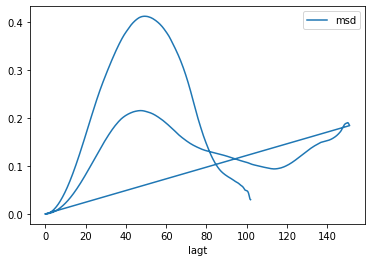

In [132]:
event_id_values=np.array(sorted(set(df.event_id.values)))
event_id=event_id_values[2]
df[df.event_id==event_id].plot(x='lagt',y='msd')
print(event_id)
plt.show()

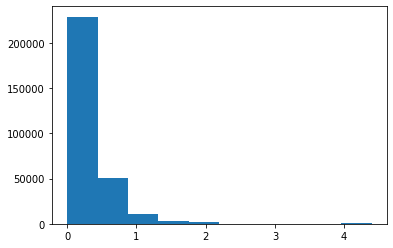

In [133]:
#DONE: make a quick histogram of msd values for each event id at a given lagt value
#filter events with unreasonable jumps in msd
# df=df_in
# msd_thresh=2
boo=(df.lagt==DT)&(df.msd<=msd_thresh)
# yv=df[boo].msd.values
yv=df.msd.values
plt.hist(yv)
plt.show()

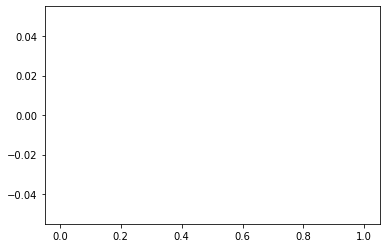

In [86]:
boo=(df.lagt==DT)&(df.msd<=msd_thresh)
yv=df[boo].msd.values
plt.hist(yv)
plt.show()

In [60]:
# from lib.measure.bootstrap import bin_and_bootstrap_xy_values

#TODO(accelerate bin_and_bootstrap_xy_values): parallelize bootstrapping by putting num_bootstrap_samples into a dask bag
#TODO(if control looks reasonable):

In [134]:
#extract values
lagt_values = df_in['lagt'].values
msd_values = df_in['msd'].values
print(f"using {npartitions} cores to bootstrap {msd_values.shape[0]} MSD observations from {trial_folder_name}...")
#bin and bootstrap results
bins = 30#'auto'  #
dict_out = bin_and_bootstrap_xy_values(x=lagt_values,
                                       y=msd_values,
                                       xlabel='lagt',
                                       ylabel=r'msd',
                                       bins=bins,
                                       min_numobs=None,
                                       num_bootstrap_samples=1000,
                                       npartitions=npartitions)
df_emsd = pd.DataFrame(dict_out)
df_emsd.head()

using 12 cores to bootstrap 297141 MSD observations from /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025...


,lagt,msd,Delta_lagt,Delta_msd,p_lagt,p_msd,counts
0,2.9250,0.003608,0.028060,0.000053,0.547230,0.870586,14100
1,8.7875,0.022643,0.027593,0.000169,0.153014,0.440741,14040
2,14.6375,0.057036,0.028804,0.000352,0.069542,0.033953,14040
3,20.4875,0.103501,0.028269,0.000585,0.153348,0.508148,14040
4,26.3500,0.157487,0.028338,0.000891,0.255019,0.822334,14100


In [135]:
#save ensemble msd
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'ensemble_msd_bins_{bins}.csv')
df_emsd.to_csv(file_out,index=False)
print('merged results saved in:')
print(file_out)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/ensemble_msd_bins_30.csv


0

In [136]:
list_of_files[0]
3000/25

120.0

In [137]:
#compute the linear fit of bootstrapped msd
df=df_emsd
xscale=0.001 #seconds per ms
xmin=10. #ms
xmax=150 #ms
xmin*=xscale
xmax*=xscale
x_values=df['lagt'].values*xscale
y_values=df['msd'].values
x_err_values=df['Delta_lagt'].values
y_err_values=df['Delta_msd'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(x_values>xmin)&(x_values<xmax)
x=x_values[boo]
y=y_values[boo]
#fix zero
def fix_zero(x):
    return np.concatenate(([0],x))
x=fix_zero(x)
y=fix_zero(y)
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"D_apparent={dict_force_fit['m']/4:.6f} +- {dict_force_fit['Delta_m']/4:.6f}")
print(f"the ols fit for diffusion coefficient was computed from {xmin:.3f} to {xmax:.3f} seconds, resulting in D={dict_force_fit['m']/4:.4f} and:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"trial_folder_name: {trial_folder_name}")

D_apparent=0.775743 +- 0.142689
the ols fit for diffusion coefficient was computed from 0.010 to 0.150 seconds, resulting in D=0.7757 and:
m=3.102973093467947
Delta_m=0.5707555664007907
b=0.11772227605426167
Delta_b=0.05110574013655117
Rsquared=0.8315573091836149
Nobs= 11339 +- 4344
trial_folder_name: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025


In [138]:
# from lib.measure.measure_diffusion_coefficient import compute_D_OLS_2D
# dict_D=compute_D_OLS_2D(lagt_values,msd_values,
#                 tmin=300,
#                 tmax=3000,
#                 tscale=0.001,
#                 DS=1)
# print(dict_D)

In [139]:
c='C0'

In [140]:
c='C1'
y_values

array([0.00360813, 0.02264256, 0.05703599, 0.10350129, 0.1574871 ,
       0.21374278, 0.26720838, 0.31365095, 0.350378  , 0.37646787,
       0.39312606, 0.40214542, 0.40662921, 0.41028237, 0.41641621,
       0.42659889, 0.44054063, 0.43567617, 0.45977618, 0.45764547,
       0.45400185, 0.43538893, 0.48831464, 0.47476859, 0.50420584,
       0.59974295])

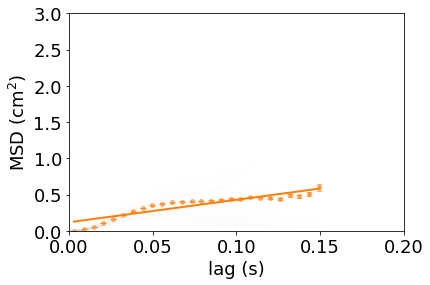

In [148]:
xlim=.2#3
ylim=3#30
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

lagt_values=df_in['lagt'].values[:10000000:100]
msd_values=df_in['msd'].values[:10000000:100]    
ax.scatter(lagt_values*xscale,msd_values,alpha=0.008,color='gray',s=1)#,alpha=1,color='k')
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c=c)
# PlotMeanSquaredDisplacements(ax, fix_zero(x_values), fix_zero(y_values), fix_zero(y_err_values), fix_zero(y_hat_values),c=c)

# # plot a known value
# xval=(x_values-np.min(x_values))*2
# ax.plot(xval,xval*8,'k-')

ax.set_xlim([0,xlim])
ax.set_ylim([0,ylim])
ax.set_xlabel('lag (s)')
plt.show()

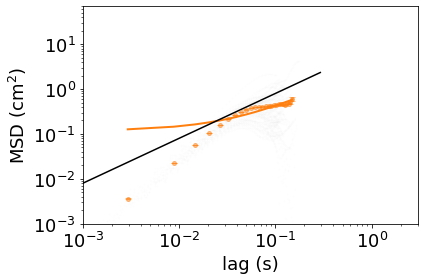

In [142]:
ylim=70
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

# lagt_values=df_in['lagt'].values[:1000000:10]
# msd_values=df_in['msd'].values[:1000000:10]    
# ax.scatter(lagt_values*xscale,msd_values,alpha=0.03,color='gray',s=1)#,alpha=1,color='k')
lagt_values=df_in['lagt'].values[:10000000:100]
msd_values=df_in['msd'].values[:10000000:100]    
ax.scatter(lagt_values*xscale,msd_values,alpha=0.008,color='gray',s=1)#,alpha=1,color='k')
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c=c)

# # plot a known value
xval=(x_values-np.min(x_values))*2
ax.plot(xval,xval*8,'k-')
ax.set_xlim([.001,3])
ax.set_ylim([.001,ylim])
ax.set_xlabel('lag (s)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [ ]:
#save msd xy values as csv
file_out_boot=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'bootstrapped_msd_bins_{bins}.csv')
df_bootstrapped=pd.DataFrame({
    'lagt_sec':x_values, 'msd_cm2':y_values, 'Delta_msd_cm2':y_err_values, 'hat_msd_cm2':y_hat_values
})
df_bootstrapped.to_csv(file_out_boot,index=False)
print('bootstrapped results saved in:')
print(file_out_boot)
beep(10)

In [ ]:
1

## (optional) repeat computation of D with the apparently less precise method of weighted averages

In [ ]:
#extract values
x_scale=0.001 #sec per ms
x_values = df_in['lagt'].values*x_scale
y_values = df_in['msd'].values/x_values

#bin and bootstrap results
bins = 30#'auto'  #
dict_out = bin_and_bootstrap_xy_values(x=x_values,
                                       y=y_values,
                                       xlabel='lagt',
                                       ylabel='y',
                                       bins=bins,
                                       min_numobs=None,
                                       num_bootstrap_samples=1000,
                                       npartitions=npartitions)
df_msdt = pd.DataFrame(dict_out)
df_msdt.head()

In [ ]:
#compute D_apparent using a weighted average
j0=1 #first value to use
x=df_msdt['lagt'].values[j0:]
y=df_msdt['y'].values[j0:]/4
y_err=df_msdt['Delta_y'].values[j0:]/4
w=df_msdt['counts'].values[j0:]
w=w/np.sum(w)
D_apparent=np.sum(w*y)
#estimate 95% CI of D_apparent using a weighted average
Delta_D_apparent=np.sqrt(np.sum(w*y_err**2))
print(f"The weighted average of each lag bin was")
print(f"D_apparent={D_apparent:.4f}+-{Delta_D_apparent:.4f} cm^2/s")
print(f"The mean time between two lag bins was {np.mean(np.diff(x)):.3f} seconds")

In [ ]:
from lib.viewer.bluf.plot_func import *
fontsize=18
alpha=0.5
c='C3'
elinewidth=3
markersize=4
capsize=3
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
#naive plot of MSD/lagt versus lagt
x=df_msdt['lagt'].values
y=df_msdt['y'].values/4
y_err=df_msdt['Delta_y'].values/4
ax.errorbar(x,y,y_err,c=c,
            alpha=alpha,
            fmt='o',
            markersize=markersize,
            ecolor=c,
            elinewidth=elinewidth,
            errorevery=1,
            capsize=capsize
           )
ax.plot(x,0.*x+8/4,'k-')
format_plot_general(ax=ax,xlabel=r'$\tau$ (seconds)',ylabel=r'MSD$/4\tau$ (cm$^2$/s)',fontsize=fontsize,use_loglog=False)#,**kwargs)
plt.show()

In [ ]:
# from lib import *
# from lib.viewer.PlotMeanSquaredDisplacements import PlotMeanSquaredDisplacements

# df=pd.read_csv(input_fn)
# #compute t0 and tf for each particle
# dft=df.groupby(pid_col)[t_col].describe()
# dft0=dft['min']
# dftf=dft['max']

# #compute t1 and t2 for each particle
# dft1=dft0+crop_start_by
# dft2=dftf-crop_end_by

# #get the list of particles dft2-dft1 \ge minimum_lifetime
# dflifetime_considered=dft2-dft1
# pid_values_to_consider=dflifetime_considered[dflifetime_considered>=minimum_lifetime].index.values

# # for pid in pid_values_to_consider[:]:
# #     #     lagt_values,msd_values=compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col=pid_col)
# #     lagt_values,msd_values=df_msd_example[df_msd_example['pid']==pid][['lagt','msd']].values.T
# #     ax.plot(lagt_values*xscale,msd_values,alpha=0.4,color='gray')

In [ ]:
# df_msd_example=compute_each_mean_squared_displacement(input_fn,**kwargs)
# df_msd_example.head()

In [ ]:
beep(5)

In [ ]:
# #TODO(later): make text interface for choosing new max_lagtime. Note max_lagtime is in units of frames, not time...
# print(f"If you want to save memory and decrease runtime decide on a reasonable value for max_lagtime!  maxt={max_lagtime}")

#TODO: load all of ^those imsd into python and compute the mean imsd, binning by lagt
#TODO: save resulting emsd to csv
#TODO: generate plots
#TODO: look at plots and decide whether to change the default tau_min and tau_max
#TODO: compute linear regression with tau_min and tau_max

# TODO: compute D as the mean value of D computed on a trial by trial basis.  Bootstrap to compute Delta_D

- DONE: try per trial basis
- TODO: try per particle basis


In [147]:
#TODO: verify that I moved this to lib and added the effected .py file to __init__.py
def compute_D(df,xscale=0.001,xmin=0.,xmax=500.):
    #compute the linear fit of bootstrapped msd
    #     df=df_emsd
    #     xscale=0.001 #seconds per ms
    #     xmin=0. #ms
    #     xmax=500 #ms
    xmin*=xscale
    xmax*=xscale
    x_values=df['lagt'].values*xscale
    y_values=df['msd'].values
    x_err_values=df['Delta_lagt'].values
    y_err_values=df['Delta_msd'].values
    counts=df['counts'].values

    #fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
    boo=(x_values>xmin)&(x_values<xmax)
    x=x_values[boo]
    y=y_values[boo]
    dict_force_fit=compute_95CI_ols(x,y)
    y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

    #(optional) rename specific values
    dict_force_fit=dict_force_fit
    y_hat_values=y_hat_values
    D=dict_force_fit['m']/4
    return D
    
#     #bluf
#     print(f"the ols fit for diffusion coefficient, D={:.4f} is:")
#     print_dict(dict_force_fit)
#     print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
#     print(f"trial_folder_name: {trial_folder_name}")

def return_compute_D(msd_fn,bins='auto'):
    ''''''
    df_in=pd.read_csv(msd_fn)
    #extract values
    lagt_values = df_in['lagt'].values
    msd_values = df_in['msd'].values
    #bin and bootstrap results
    #'auto'  #
    df_emsd = bin_and_bootstrap_xy_values(x=lagt_values,
                                           y=msd_values,
                                           xlabel='lagt',
                                           ylabel=r'msd',
                                           bins=bins,
                                           min_numobs=None,
                                           num_bootstrap_samples=1000,
                                           npartitions=npartitions,
                                         printing=False)
    return compute_D(df_emsd)



In [231]:
# #input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
# #Load example particle Log file where I want to compute MSD and tracking has already been done 
# #(good): data that uses explicit particle tracking
# # input_fn=search_for_file()
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
# # input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'

#TODO: no attraction, no annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: no attraction with annihilation
# input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/Log/pbc_particle_log1_log.csv"

#TODO: attraction with annihilation

#TODO: attraction with annihilation but without diffusion

# #TODO: full models

# def return_msd_particle_average(input_fn,pid_col='pid_explicit',t_col='t',ds=10,width=10,height=10,
#                                 **kwargs):
#     '''    
#     input_fn is a .csv locating a trajectory file with particles identified by pid_col 
#     and time indicated by t_col
#     ds is the total domain size and width and height are the number of length units / pixels afforded to the original computational domain.
#     kwargs are passed to unwrap_traj_and_center
    
#     previously named return_msd_phys
#     TODO: GPU accelerate this pandas-like function with rapids cudf
#     '''
#     df=pd.read_csv(input_fn)
#     trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
    
    
#     #(bad)particle data analyzed using full model pipeline
#     # input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
#     # width=10 #width of computational domain
#     # ds   =10  #cm
#     # #from here on, we will use units in terms of those used by the full model
#     # height=width
#     DS=ds/width

#     #unwrap trajectories
#     pid_lst = sorted(set(df[pid_col].values))
#     #(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
#     # pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
#     df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, **kwargs) for pid in pid_lst])
#     DT=get_DT(df,pid_col=pid_col) #ms
#     df[df.frame==2].describe()
#     df['sd']=df['x']**2+df['y']**2
#     d_msd=df.groupby('t')['sd'].mean()
#     lagt_values=d_msd.index.values
#     msd_values=d_msd.values
#     return lagt_values,msd_values

# def compute_D_OLS_2D(lagt_values,msd_values,
#                 tmin=0,
#                 tmax=0,
#                 tscale=0.001,
#                 DS=1.):
#     xmin=tmin*tscale
#     xmax=tmax*tscale
#     x_values=lagt_values*tscale
#     y_values=msd_values*DS**2
#     # x_err_values=df['Delta_lagt'].values
#     # y_err_values=df['Delta_msd'].values
#     # counts=df['counts'].values

#     #fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
#     boo=(x_values>xmin)&(x_values<xmax)
#     x=x_values[boo]
#     y=y_values[boo]
#     dict_force_fit=compute_95CI_ols(x,y)
#     y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#     #(optional) rename specific values
#     dict_force_fit=dict_force_fit
#     y_hat_values=y_hat_values
#     D=dict_force_fit['m']/4
#     Delta_D=dict_force_fit['D']/4
#     dict_out={
#         'D':D,
#         'Delta_D':Delta_D,
#         'Rsquared':dict_force_fit['Rsquared']
#     }
#     return D

In [157]:
D_apparent_lst=[]
for fn in list_of_files:
    D_apparent_lst.append(return_compute_D(fn))
    
print(np.mean(D_apparent_lst))
print(np.std(D_apparent_lst))

2.4925620155188772
0.8511114065985788


In [160]:
beep(2)

0

In [176]:
n=13
print(np.gmean(D_apparent_lst[:n]))
print(np.std(D_apparent_lst[:n]))

AttributeError: module 'numpy' has no attribute 'gmean'

In [178]:
import numpy as np

# def geo_mean_overflow(iterable):
#     a = np.log(iterable)
#     return np.exp(a.mean())

geo_mean_overflow(D_apparent_lst),np.median(D_apparent_lst),np.mean(D_apparent_lst)

(2.3836281109259736, 2.212109350053237, 2.4925620155188772)

I doubt computing individual particle's D values will have a significant effect on the average value when breaking up by trial did not...

It would lend itself to filtering any false tips

The ensemble-averaged mean squared displacement was computed according to 
$$
\text{MSD}(\tau)=\mathbb{E}\Big[ (r(\tau) - r(0) )^2  \Big]_\text{particles}
$$


The time-averaged mean squared displacement was computed according to 
$$
\Delta^2(\tau)=\mathbb{E}\Big[ (r(t+\tau) - r(t) )^2  \Big]_\text{t}
$$


In [201]:
df=pd.read_csv(input_fn)
unwrap_trajectories?

In [181]:
pid_col='pid_explicit'
t_values=np.array(sorted(set(df.t.values)))
pid_values=np.array(sorted(set(df[pid_col].values)))

In [185]:
t0=np.min(t_values)
x0_values=df.loc[df.t==t0,'x'].values
y0_values=df.loc[df.t==t0,'y'].values

(16,)

In [211]:
# for pid in pid_values:
#     #select particle and extract trajectory
#     #subtract off initial position
#     #compute the norm / magnitude of the net displacement at each time point
#     #add each time point to a running total at each time point
#     #increment the count of observations at each time point

In [210]:
# xyt_values=df[df[pid_col]==pid][['x','y','t']].values
# xyt_values-=xyt_values[0]
# lag_values=xyt_values[:,-1]
# displacement_values=xyt_values[:,:2]
# displacement_values

In [ ]:
x

In [215]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(return_msd_particle_average)
start = time.time()
tuple_lst=list(b)
# D_apparent_lst = list(b)
# print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
# beep(3)
# print((geo_mean_overflow(D_apparent_lst),np.median(D_apparent_lst),np.mean(D_apparent_lst),np.std(D_apparent_lst)))
# list_of_files=retval
# list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# # list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
# print(f"wrote {len(list_of_files)} output files to a common folder")
# assert (len(list_of_files)>0)

run time for computing mean squared displacements was 386.86 seconds.
(2.2207477027140863, 2.048612039525339, 2.759752260725528, 3.392611667160421)


Testing a straight forward computation of D, where we average over space first...

```
run time for computing mean squared displacements was 386.86 seconds.
(2.2207477027140863, 2.048612039525339, 2.759752260725528, 3.392611667160421)
```

So... Those don't match except for the median...


TODO: try computing the sum and the count for each time bin over all particles found in all trajectory files...


# TODO: bootstrap and plot MSD/lagt versus lagt
- TODO(optional): plot bootstrapped MSD and lagt on a log-log plot
- TODO: bootstrap and plot dR/dt * R versus R